# Data Cleaning of finanacial loan database.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("financial_loan 1(financial_loan).csv")
df

,id,address_state,application_type,emp_length,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430.0,GA,INDIVIDUAL,< 1 year,C,RENT,2/11/2021,9/13/2021,4/13/2021,Charged Off,...,C4,60 months,Source Verified,NaN,0.0100,59.83,15.27%,2500.0,4,1009
1,1072053.0,CA,INDIVIDUAL,9 years,E,RENT,1/1/2021,12/14/2021,1/15/2021,Fully Paid,...,E1,36 months,Source Verified,843790.0,0.0535,109.43,18.64%,3000.0,4,3939
2,NaN,CA,INDIVIDUAL,4 years,C,RENT,1/5/2021,12/12/2021,1/9/2021,Charged Off,...,C5,36 months,Not Verified,1129107.0,0.2088,421.65,15.96%,12000.0,11,3522
3,1041756.0,TX,INDIVIDUAL,< 1 year,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,Fully Paid,...,B2,60 months,Source Verified,NaN,0.0540,97.06,10.65%,4500.0,9,4911
4,1068350.0,IL,INDIVIDUAL,10+ years,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,Fully Paid,...,A1,36,Verified,182055.0,0.0231,106.53,6.03%,3500.0,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452.0,NJ,INDIVIDUAL,38563 years,C,MORTGAGE,7/11/2021,5/16/2021,5/16/2021,Current,...,C1,60 months,Verified,732616.0,0.1986,551.64,12.99%,24250.0,33,31946
38572,970377.0,NY,INDIVIDUAL,38564 years,C,RENT,10/11/2021,4/16/2021,5/16/2021,Current,...,C1,60 months,Verified,325144.0,0.0458,579.72,13.49%,25200.0,18,31870
38573,875376.0,CA,INDIVIDUAL,38565 years,D,RENT,9/11/2021,5/16/2021,5/16/2021,Current,...,D5,60 months,Verified,1189470.0,0.1734,627.93,17.49%,25000.0,20,35721
38574,972997.0,NY,INDIVIDUAL,38566 years,D,RENT,10/11/2021,5/16/2021,5/16/2021,Current,...,D5,60 months,Verified,875772.0,0.0009,612.72,18.25%,24000.0,9,33677


In [2]:
df.shape

(38576, 23)

## Check data types

In [3]:
df.dtypes

id                       float64
address_state             object
application_type          object
emp_length                object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                  object
loan_amount              float64
total_acc                  int64
total_payment              int64
dtype: object

## Convert column data types into proper format

In [4]:
df['issue_date']=pd.to_datetime(df['issue_date'])     
df['last_credit_pull_date']=pd.to_datetime(df['last_credit_pull_date'])  
df['last_payment_date']=pd.to_datetime(df['last_payment_date'])  
df['next_payment_date']=pd.to_datetime(df['next_payment_date'])  

In [5]:
df['int_rate']=df['int_rate'].str.replace('%','',regex=False)

In [6]:
df['int_rate']=pd.to_numeric(df['int_rate'])

In [7]:
df.dtypes

id                              float64
address_state                    object
application_type                 object
emp_length                       object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                     float64
total_acc                         int64
total_payment                     int64
dtype: object

## Handle Missing Values

In [8]:
df.isnull().sum()

id                       55
address_state             0
application_type          0
emp_length                0
grade                    58
home_ownership            0
issue_date                0
last_credit_pull_date     0
last_payment_date         0
loan_status               0
next_payment_date         0
member_id                 0
purpose                   0
sub_grade                 0
term                      0
verification_status       0
annual_income            37
dti                       0
installment               0
int_rate                 47
loan_amount              23
total_acc                 0
total_payment             0
dtype: int64

##  Missing ID → Drop the rows

In [9]:
df=df.dropna(subset=['id'])
df['id'].isnull().sum()

0

## Missing Grade → Fill With Mode (Most Frequent)

In [10]:
mode=df['grade'].mode()[0]
df['grade']=df['grade'].fillna(mode)
df['grade'].isnull().sum()

C:\Users\aksha\AppData\Local\Temp\ipykernel_17236\775365298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade']=df['grade'].fillna(mode)


0

In [11]:
df['annual_income'].fillna(df['annual_income'].median(),inplace=True)
df['annual_income'].isnull().sum()

C:\Users\aksha\AppData\Local\Temp\ipykernel_17236\234231408.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_income'].fillna(df['annual_income'].median(),inplace=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_17236\234231408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annual_income'].fillna(df['annual_income'].medi

0

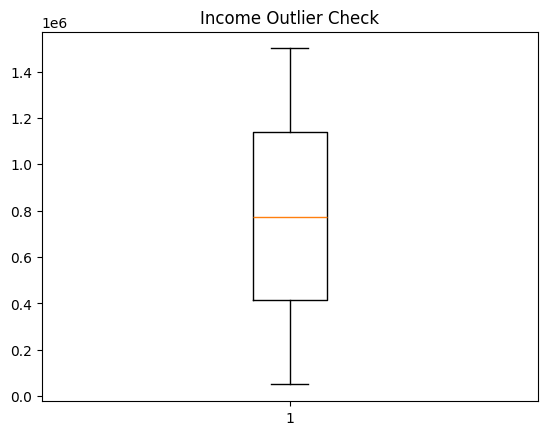

In [12]:
plt.boxplot(df['annual_income'])
plt.title("Income Outlier Check")
plt.show()

### Rows without interest rate cannot be used for further calculation
### Also interest rate is not predictable because it depends on credit risk parameters.
## Drop those rows

In [12]:
df=df.dropna(subset=['int_rate'])
df['int_rate'].isnull().sum()

0

## Outlier Check

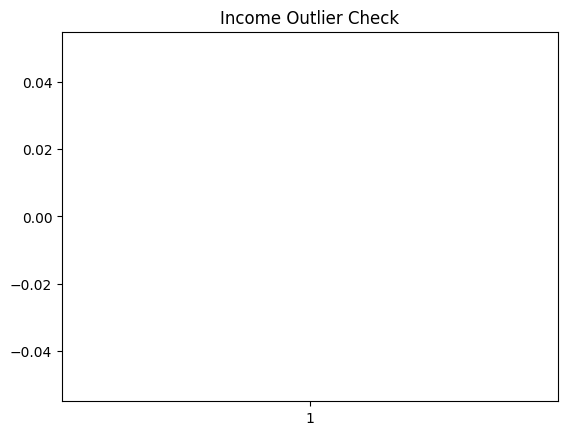

In [13]:
plt.boxplot(df['loan_amount'])
plt.title("Income Outlier Check")
plt.show()

## Loan amounts usually have outliers. Median Is a Good Choice for loan_amount

In [14]:
median=df['loan_amount'].median()
df['loan_amount']=df['loan_amount'].fillna(median)
df['loan_amount'].isnull().sum()

0

## All Null Values were removed

In [15]:
df.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

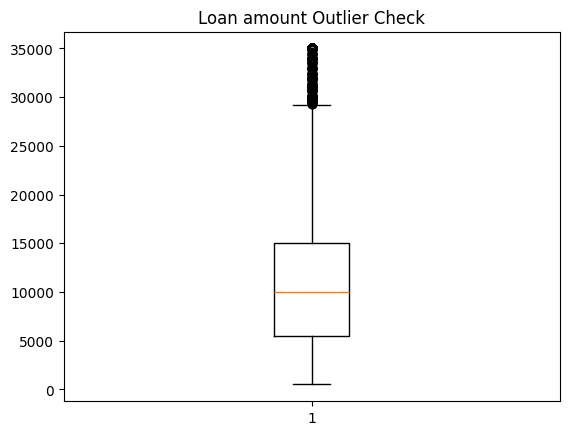

In [16]:
plt.boxplot(df['loan_amount'])
plt.title("Loan amount Outlier Check")
plt.show()

### Even after filling the missing values with the median, the loan_amount column still shows some outliers.
### This is expected in financial datasets where some customers take significantly higher loans.
### Hence, outliers are kept as they represent genuine business cases.

## Check for duplicates

In [17]:
df['id'].duplicated().sum()

0

## Check duplicated rows

In [18]:
df[df.duplicated()].shape

(0, 23)

## Check fromat for each column

In [19]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'grade',
       'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [20]:
df['address_state'].unique()

array(['GA', 'CA', 'TX', 'IL', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI', 'NV',
       'PA', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT', 'CO',
       'TN', 'VA', 'MO', 'DE', 'NM', 'MN', 'LA', 'AR', 'KY', 'SC', 'WV',
       'UT', 'KS', 'WY', 'OR', 'AL', 'NC', 'VT', 'MS', 'DC', 'SD', 'MT',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [21]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [22]:
df['emp_length'].unique()

array(['< 1 year', '9 years', '10+ years', ..., '38565 years',
       '38566 years', '38567 years'], dtype=object)

In [23]:
df.drop('emp_length', axis=1, inplace=True)

### The emp_length column contains many invalid and unrealistic values (e.g., 38,000+ years), which makes the data unreliable. Since it cannot be cleaned meaningfully,
### That's why drop this column

In [24]:
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [25]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'rent', 'OWN', 'own', 'mortage', 'OTHER',
       'NONE'], dtype=object)

## Replace the values which are repeated

In [27]:
df['home_ownership'].replace({'rent':'RENT','own':'OWN','mortage':'MORTAGE','MORTGAGE':'MORTAGE'},inplace=True)

In [28]:
df['home_ownership'].unique()

array(['RENT', 'MORTAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [29]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'FP', 'CO', 'Current'], dtype=object)

In [31]:
df['loan_status'].replace({'FP':'Fully Paid','CO':'Charged Off'},inplace=True)

In [32]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [33]:
df['purpose'].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [34]:
df['sub_grade'].unique()

array(['C4', 'E1', 'B2', 'A1', 'C3', 'C2', 'A5', 'B5', 'B4', 'B3', 'B1',
       'D1', 'A2', 'A3', 'A4', 'D2', 'C1', 'C5', 'D3', 'D4', 'E3', 'E2',
       'E5', 'D5', 'E4', 'F1', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [35]:
df['term'].unique()

array([' 60 months', ' 36 months', '36', '60'], dtype=object)

In [37]:
df['term'].replace({'36':'36 months','60':'60 months'},inplace=True)

In [38]:
df['term'].unique()

array([' 60 months', ' 36 months', '36 months', '60 months'], dtype=object)

## remove leading/trailing spaces

In [39]:
df['term']=df['term'].str.strip()

## remove 'months'

In [40]:
df['term']=df['term'].str.replace(' months','')

## convert to numbers

In [41]:
df['term']=df['term'].astype(int)

In [42]:
df['term'].unique()

array([60, 36])

In [43]:
df['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [44]:
df['total_acc'].unique()

array([ 4,  9, 28, 11, 30, 31, 21, 33, 13,  3, 18, 14,  8,  7, 23, 20, 39,
       24, 19, 27, 10, 16, 45, 25,  5, 43, 29, 22, 35,  6, 36, 17, 26, 37,
       32, 47, 52, 41, 15, 42, 46, 12, 50, 34, 59, 38, 63, 49, 48, 51, 40,
       53, 55, 44, 61, 62, 58, 67, 54, 57, 56, 70,  2, 64, 60, 80, 79, 71,
       66, 65, 69, 90, 68, 74, 75, 87, 78, 72, 77, 81, 76, 73],
      dtype=int64)

In [45]:
df['total_payment'].unique()

array([ 1009,  3939,  4911, ..., 31870, 35721, 33677], dtype=int64)

## Cleaned Data

In [46]:
df

,id,address_state,application_type,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430.0,GA,INDIVIDUAL,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,...,C4,60,Source Verified,773038.0,0.0100,59.83,15.27,2500.0,4,1009
1,1072053.0,CA,INDIVIDUAL,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,E1,36,Source Verified,843790.0,0.0535,109.43,18.64,3000.0,4,3939
3,1041756.0,TX,INDIVIDUAL,B,MORTAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,...,B2,60,Source Verified,773038.0,0.0540,97.06,10.65,4500.0,9,4911
4,1068350.0,IL,INDIVIDUAL,A,MORTAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,A1,36,Verified,182055.0,0.0231,106.53,6.03,3500.0,28,3835
5,1062608.0,CA,INDIVIDUAL,C,RENT,2021-07-17,2021-03-16,2021-08-12,Fully Paid,2021-09-12,...,C3,36,Not Verified,124042.0,0.1260,275.96,14.65,8000.0,11,8637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452.0,NJ,INDIVIDUAL,C,MORTAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,...,C1,60,Verified,732616.0,0.1986,551.64,12.99,24250.0,33,31946
38572,970377.0,NY,INDIVIDUAL,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,...,C1,60,Verified,325144.0,0.0458,579.72,13.49,25200.0,18,31870
38573,875376.0,CA,INDIVIDUAL,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,...,D5,60,Verified,1189470.0,0.1734,627.93,17.49,25000.0,20,35721
38574,972997.0,NY,INDIVIDUAL,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,...,D5,60,Verified,875772.0,0.0009,612.72,18.25,24000.0,9,33677


In [55]:
df.to_excel("Loan_data.xlsx", index=False)

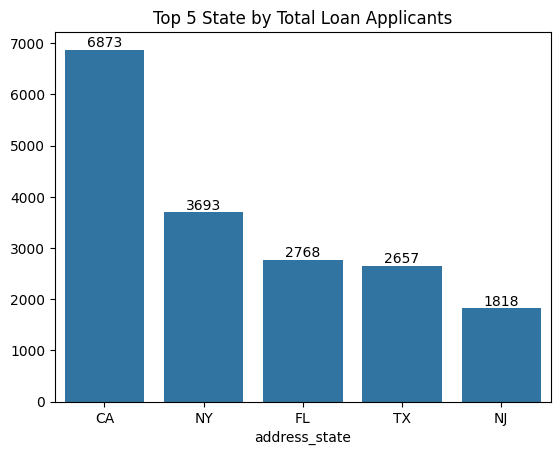

In [48]:
gb=df.groupby('address_state')['id'].count().sort_values(ascending=False).head(5)
ax=sns.barplot(x=gb.index,y=gb.values)
ax.bar_label(ax.containers[0])
plt.title("Top 5 State by Total Loan Applicants")
plt.show()

### California (CA) has the highest number of loan applicants,howing it has the most active borrowers in the dataset.
### NY, FL, TX, and NJ also show strong loan activity, suggesting these states have high credit demand and larger customer bases.

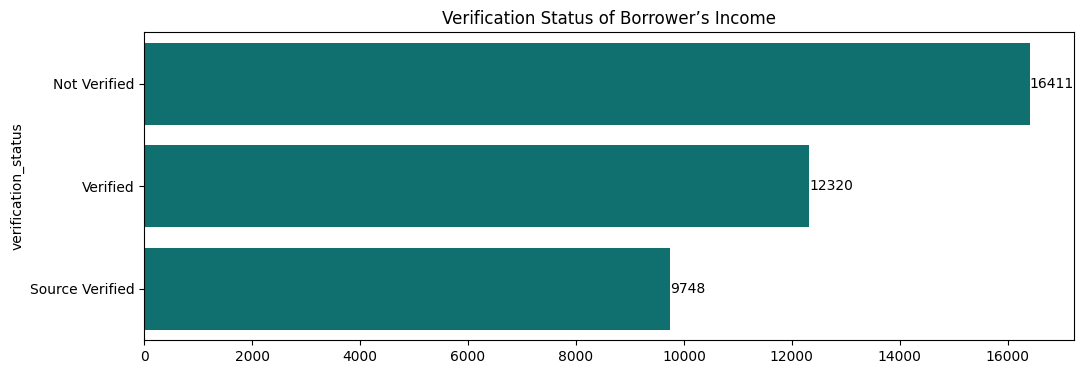

In [49]:
gb=df.groupby('verification_status')['id'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,4))
ax=sns.barplot(y=gb.index,x=gb.values,color="teal")
ax.bar_label(ax.containers[0])
plt.title("Verification Status of Borrower’s Income")
plt.show()

### Most borrowers have income that is not verified, which may indicate easier approval criteria or incomplete documentation.
### Verified and Source Verified incomes are comparatively lower, suggesting that stricter verification is done for fewer applicants.

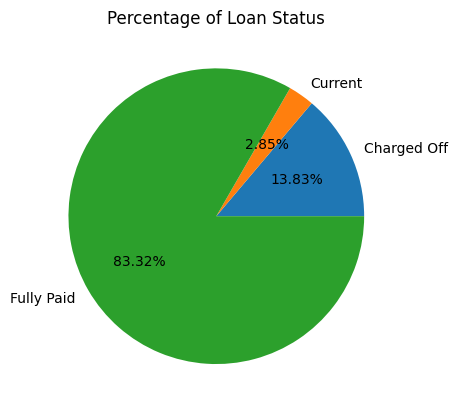

In [50]:
gb=df.groupby('loan_status')['id'].count()
plt.pie(gb,labels=gb.index,autopct='%0.2f%%')
plt.title("Percentage of Loan Status")
plt.show()

### Most borrowers (83.32%) have fully repaid their loans, indicating overall good repayment behavior in the dataset.
### Only 13.83% loans are charged off, showing a moderate default rate, while 2.85% are still current, representing ongoing repayments.

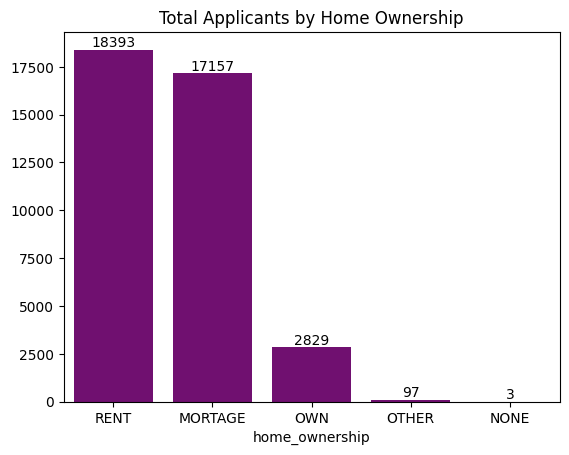

In [51]:
gb=df.groupby('home_ownership')['id'].count().sort_values(ascending=False)
ax=sns.barplot(x=gb.index,y=gb.values,color='purple')
ax.bar_label(ax.containers[0])
plt.title("Total Applicants by Home Ownership")
plt.show()

### Most applicants either rent (18,393) or have a mortgage (17,157), indicating that the majority do not fully own their homes.
### Very few applicants fully own their homes, so non–homeowners (renters + mortgage holders) have a higher need to apply for loans.”

In [52]:
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

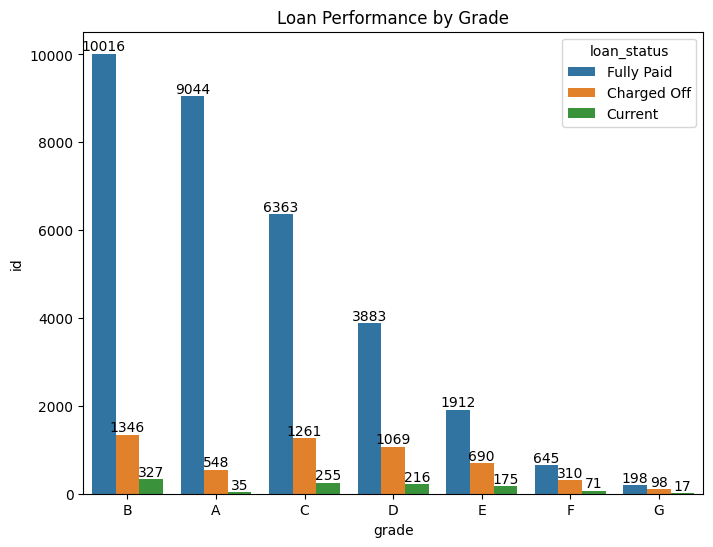

In [53]:
gb=df.groupby(['grade','loan_status'])['id'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,6))
ax=sns.barplot(x='grade',y='id',hue='loan_status',data=gb)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Loan Performance by Grade")
plt.show()

### Higher grades (A–C) show strong repayment, with most loans marked as Fully Paid
### Defaults increase in lower grades (E–G), indicating higher credit risk.
### Grade B has the highest number of loans and still maintains a good repayment rate.